# British Airways Customers Experience

# Importing Libraries and Dependencies

In [1]:
#Importing Libraries and dependencies
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Web Scraping

In [2]:
# Send a request to the website and get the HTML content
url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'
response = requests.get(url)
html = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')


In [3]:
page =requests.get(url)

In [4]:
page.content

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-GB"> <!--<![endif]-->\n\t<head>\n\t\t<meta charset="utf-8">\n\n\t\t<title>British Airways Customer Reviews - SKYTRAX</title>\n\n\t\t<!-- Google Chrome Frame for IE -->\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n\t\t<!-- mobile meta -->\n\t\t<meta name="HandheldFriendly" content="True">\n\t\t<meta name="MobileOptimized" content="320">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no"/>\n\t\t<!-- icons & favicons -->\n\t\t<link rel="apple-touch-icon" href="https://www.airlinequality.com/wp-c

In [5]:
soup= BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-GB"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>British Airways Customer Reviews - SKYTRAX</title>
<!-- Google Chrome Frame for IE -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<!-- mobile meta -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<!-- icons & favicons -->
<link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-icon-touch.png" rel="apple-tou

In [6]:
# Find all HTML elements with itemprop='name' to get first 100 customers name
name_elements = soup.findAll('span', {'itemprop': 'name'})

# Loop over the name elements and print their text content
for name_element in name_elements:
    name = name_element.get_text().strip()
    print(name)


Martin McCormack
R Worton
N Gale
S Marber
Monica Cullen
Robert Davis
J Robinson
Larry Schwartz
Helen Thomson
Farid Filsoof
M Kaminsky
L Howard
Pam Schell
Janeks Volkovs
M Camere
M Camere
Gustavo Sirna Barbosa
Gustavo Sirna Barbosa
R Mawani
Chris Parker
C Barton
Abs Ahmed
Arsham Parsi
Keat Tan
Adam Churchill
Maria del Carmen Riesco Martin
S Anderson
M Wilson
Christopher Neep
Kathleen Lucey
Ian Sinclair
E Smyth
Horton
Marian Benedikovic
Thomas Kowalski
Reyes Diaz
S Zarhas
E Smyth
Jozef Kis
Sam Hassan
C Bain
C Bain
Hans Book
G Jackson
J Tucker
R Heale
J Robins
Stephen Segar
J Meares
J Meares
S Marton
D Bartul
Michel Perrin
Amanda Edgar
Andrew Wilkes
Nick Walker
E King
Richard Cowling
R Marton
S Ward
Jeremy Archdale
Andrew Mortimer
C King
R Vines
A Lavochil
A Gateolis
B Galanez
T Darsen
Ian Sinclair
S SI
R Vines
Connor Heward
M Beale
H Davidson
Raneem Awad
J Meares
Flavia Malusardi
R Gonzaga
Iviano Ossuetta
Georgeta Costache
R Zhang
C Barton
Amanda Edgar
Peter Pomeranze
Peter Pomeranze
P M

In [7]:
# Find all HTML elements with itemprop='name' and saving them in a dictionary
name_elements = soup.findAll('span', {'itemprop': 'name'})

# Create an empty dictionary to store the names
name_dict = {}

# Loop over the name elements and store their text content in the dictionary
for i, name_element in enumerate(name_elements):
    name = name_element.get_text().strip()
    name_dict[i] = name

# Print the dictionary
print(name_dict)


{0: 'Martin McCormack', 1: 'R Worton', 2: 'N Gale', 3: 'S Marber', 4: 'Monica Cullen', 5: 'Robert Davis', 6: 'J Robinson', 7: 'Larry Schwartz', 8: 'Helen Thomson', 9: 'Farid Filsoof', 10: 'M Kaminsky', 11: 'L Howard', 12: 'Pam Schell', 13: 'Janeks Volkovs', 14: 'M Camere', 15: 'M Camere', 16: 'Gustavo Sirna Barbosa', 17: 'Gustavo Sirna Barbosa', 18: 'R Mawani', 19: 'Chris Parker', 20: 'C Barton', 21: 'Abs Ahmed', 22: 'Arsham Parsi', 23: 'Keat Tan', 24: 'Adam Churchill', 25: 'Maria del Carmen Riesco Martin', 26: 'S Anderson', 27: 'M Wilson', 28: 'Christopher Neep', 29: 'Kathleen Lucey', 30: 'Ian Sinclair', 31: 'E Smyth', 32: 'Horton', 33: 'Marian Benedikovic', 34: 'Thomas Kowalski', 35: 'Reyes Diaz', 36: 'S Zarhas', 37: 'E Smyth', 38: 'Jozef Kis', 39: 'Sam Hassan', 40: 'C Bain', 41: 'C Bain', 42: 'Hans Book', 43: 'G Jackson', 44: 'J Tucker', 45: 'R Heale', 46: 'J Robins', 47: 'Stephen Segar', 48: 'J Meares', 49: 'J Meares', 50: 'S Marton', 51: 'D Bartul', 52: 'Michel Perrin', 53: 'Amand

In [8]:
#get the value of header
header_element = soup.find('h2', {'class': 'text_header'})
# Get the text content of the header element
header = header_element.get_text().strip()
# Print the header
print(header)

"one of the worst experiences"


In [9]:
# Find the first 100 HTML elements with h2 tag and class attribute set to 'text_header'
header_elements = soup.findAll('h2', {'class': 'text_header'})[:100]

# Create an empty dictionary to store the headers
header_dict = {}

# Loop over the header elements and store their text content (with quotation signs removed) in the dictionary
for i, header_element in enumerate(header_elements):
    header = header_element.get_text().strip().replace('"', '')
    header_dict[i] = header

# Print the dictionary
print(header_dict)


{0: 'one of the worst experiences', 1: 'a horror show of incompetence', 2: 'My baggage never arrived', 3: 'Total disruption, wasted time', 4: 'what an absolute nightmare', 5: 'I detest British Airways', 6: 'Clean aircraft, good crew, professional', 7: 'this airline is horrible', 8: 'avoid flying British Airways', 9: 'had better treatment from Ryanair', 10: 'Would happily fly them again', 11: 'one drink service on 10 hour flight', 12: 'squashed into regular seats', 13: 'nice and professional crew', 14: 'acceptable experience, nothing more', 15: "FA's were very friendly", 16: 'original flight was cancelled', 17: 'no better than a low cost airline', 18: 'they could not serve hot drinks', 19: 'got virtually free tickets', 20: 'found the attitude appalling', 21: 'crew were really nice', 22: 'Lots of cancellations and delays', 23: 'Overall, very happy with BA', 24: "the best airline I've flown with", 25: 'so determined to help', 26: 'crew are a credit to BA', 27: 'catalogue of errors and inc

In [10]:
# Find the first 100 HTML elements with h2 tag and class attribute set to 'text_header'
header_elements = soup.findAll('h2', {'class': 'text_header'})[:100]

# Create an empty dictionary to store the headers
header_dict = {}

# Loop over the header elements and store their text content in the dictionary
for i, header_element in enumerate(header_elements):
    header = header_element.get_text().strip()
    header_dict[i] = header

# Print the dictionary
print(header_dict)


{0: '"one of the worst experiences"', 1: '"a horror show of incompetence"', 2: '"My baggage never arrived"', 3: '"Total disruption, wasted time"', 4: '"what an absolute nightmare"', 5: '"I detest British Airways"', 6: '"Clean aircraft, good crew, professional"', 7: '"this airline is horrible"', 8: '"avoid flying British Airways"', 9: '"had better treatment from Ryanair"', 10: '"Would happily fly them again"', 11: '"one drink service on 10 hour flight"', 12: '"squashed into regular seats"', 13: '"nice and professional crew"', 14: '"acceptable experience, nothing more"', 15: '"FA\'s were very friendly"', 16: '"original flight was cancelled"', 17: '"no better than a low cost airline"', 18: '"they could not serve hot drinks"', 19: '"got virtually free tickets"', 20: '"found the attitude appalling"', 21: '"crew were really nice"', 22: '"Lots of cancellations and delays"', 23: '"Overall, very happy with BA"', 24: '"the best airline I\'ve flown with"', 25: '"so determined to help"', 26: '"cre

In [11]:
Text_review =soup.findAll(attrs ={'class': 'text_content'})
Text_review

[<div class="text_content" itemprop="reviewBody"><strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Not Verified</em></a></strong> |  This was literally one of the worst experiences. I haven’t been to an airport since. It began in Orlando flying back the flight plan system went down and we were stuck on the tarmac for 6 hours. Poor customer service and just ignored at times. Then missed my connecting flight and we were told not to leave the baggage area without our bags. Even though I booked through to Dublin. Another 4 hours I was told my bags were lost and to continue to the desk to book a flight. Another hour later I was handed a card with a number and told to ring it. I was cut off three times and told I wouldn’t be able to get home that day despite several flights being available. Just booked my own flight and had lost my suit and presents for Christmas and missed an engagement party.</div>,
 <div class="text_content" itemprop="reviewBody">✅ <strong><a href="ht

In [12]:
#Removing of extra text and saving in the dictionary
text_reviews = soup.findAll(attrs={'class': 'text_content'})

# Create an empty dictionary to store the text content
reviews_dict = {}

# Loop over each text content element and extract the text content
for i, review in enumerate(text_reviews):
    text = review.get_text().strip()
    # Remove '✅ Trip Verified' or 'Not Verified |' from the beginning of the review text
    prefixes = ['✅ Trip Verified', 'Not Verified |']
    for prefix in prefixes:
        if text.startswith(prefix):
            text = text[len(prefix):].strip()
            break
    reviews_dict[i] = text

print(reviews_dict)


{0: 'This was literally one of the worst experiences. I haven’t been to an airport since. It began in Orlando flying back the flight plan system went down and we were stuck on the tarmac for 6 hours. Poor customer service and just ignored at times. Then missed my connecting flight and we were told not to leave the baggage area without our bags. Even though I booked through to Dublin. Another 4 hours I was told my bags were lost and to continue to the desk to book a flight. Another hour later I was handed a card with a number and told to ring it. I was cut off three times and told I wouldn’t be able to get home that day despite several flights being available. Just booked my own flight and had lost my suit and presents for Christmas and missed an engagement party.', 1: '|  The usual shambolic unfolding that BA has now unfortunately been come to known for. We had a long weekend flight booked to Munich that was supposed to be departing on 9th February at 19:55. This happened to be our fir

In [13]:
# Find the HTML element with tag 'td' and class attribute set to 'class_name'
td_element = soup.find('td', {'class': 'review-value'})

# Check if td_element is not None
if td_element is not None:
    # Get the text content of the td element
    td_content = td_element.get_text().strip()

    # Print the td content
    print(td_content)


Solo Leisure


In [14]:
# Find all HTML elements with tag 'td' and class attribute set to 'review-value'
td_elements = soup.find_all('td', {'class': 'review-value'})

# Initialize a dictionary to store the seat types
seat_types = {}

# Loop over the td elements and store their text content in the dictionary
for i, td_element in enumerate(td_elements[:100]):
    seat_type = td_element.get_text().strip()
    seat_types[i] = seat_type

print(seat_types)


{0: 'Solo Leisure', 1: 'Economy Class', 2: 'Dublin to Orlando via Heathrow', 3: 'December 2022', 4: 'no', 5: 'Family Leisure', 6: 'Economy Class', 7: 'London Heathrow to Munich', 8: 'March 2023', 9: 'no', 10: 'Business', 11: 'Business Class', 12: 'London to Dubai', 13: 'December 2022', 14: 'no', 15: 'A320', 16: 'Solo Leisure', 17: 'Economy Class', 18: 'Geneva to London', 19: 'March 2023', 20: 'no', 21: 'Family Leisure', 22: 'Economy Class', 23: 'Prague to London', 24: 'December 2022', 25: 'no', 26: 'Business', 27: 'Economy Class', 28: 'Heathrow to Glasgow', 29: 'March 2023', 30: 'no', 31: 'A321', 32: 'Business', 33: 'Economy Class', 34: 'London Heathrow to Arlanda Stockholm', 35: 'March 2023', 36: 'yes', 37: 'Couple Leisure', 38: 'Business Class', 39: 'Portland to Tel Aviv via Heathrow', 40: 'March 2023', 41: 'no', 42: 'Solo Leisure', 43: 'Business Class', 44: 'Heathrow to Milan Malpensa', 45: 'April 2022', 46: 'no', 47: 'Solo Leisure', 48: 'Economy Class', 49: 'London to Los Angeles',

In [15]:
rating_element = soup.find('span', {'itemprop': 'ratingValue'})
rating_value = rating_element.get_text().strip()
print(rating_value)

5


In [16]:
#Scrapin 100 values in ratingvalue tag and saved in dcitionary
ratings = soup.find_all('div', {'class': 'rating-10'})
ratings_dict = {}

for i in range(min(len(ratings), 100)):
    rating = ratings[i]
    rating_value = rating.find('span', {'itemprop': 'ratingValue'}).get_text()
    ratings_dict[i] = rating_value

print(ratings_dict)

{0: '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', 1: '1', 2: '1', 3: '2', 4: '1', 5: '1', 6: '1', 7: '8', 8: '1', 9: '1', 10: '2', 11: '10', 12: '4', 13: '1', 14: '8', 15: '6', 16: '7', 17: '1', 18: '1', 19: '4', 20: '5', 21: '1', 22: '8', 23: '1', 24: '9', 25: '10', 26: '10', 27: '10', 28: '2', 29: '4', 30: '3', 31: '9', 32: '9', 33: '9', 34: '2', 35: '3', 36: '2', 37: '9', 38: '9', 39: '1', 40: '3', 41: '4', 42: '5', 43: '1', 44: '1', 45: '2', 46: '8', 47: '6', 48: '4', 49: '4', 50: '3', 51: '1', 52: '1', 53: '8', 54: '3', 55: '1', 56: '1', 57: '2', 58: '2', 59: '5', 60: '6', 61: '1', 62: '8', 63: '3', 64: '6', 65: '3', 66: '4', 67: '3', 68: '1', 69: '9', 70: '2', 71: '7', 72: '7', 73: '1', 74: '4', 75: '1', 76: '2', 77: '1', 78: '5', 79: '1', 80: '1', 81: '1', 82: '6', 83: '1', 84: '9', 85: '9', 86: '3', 87: '9', 88: '2', 89: '8', 90: '1', 91: '3', 92: '7', 93: '8', 94: '9', 95: '1', 96: '10', 97: '3', 98: '6', 99: '7'}


In [17]:
#Making of the dataset by merging all the dictionaries together
merged_dict = {}
for key in name_dict:
    merged_dict[key] = (name_dict[key], header_dict[key], reviews_dict[key], seat_types[key], ratings_dict[key])

df = pd.DataFrame.from_dict(merged_dict, orient='index', columns=['Name', 'Header', 'Review', 'Seat Type', 'Rating'])
df

,Name,Header,Review,Seat Type,Rating
0,Martin McCormack,"""one of the worst experiences""",This was literally one of the worst experience...,Solo Leisure,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,R Worton,"""a horror show of incompetence""",| The usual shambolic unfolding that BA has n...,Economy Class,1
2,N Gale,"""My baggage never arrived""",Lost my case and took 6 weeks to locate it and...,Dublin to Orlando via Heathrow,1
3,S Marber,"""Total disruption, wasted time""",| The incoming and outgoing flight was delaye...,December 2022,2
4,Monica Cullen,"""what an absolute nightmare""",| Back in December my family and I as we were...,no,1
...,...,...,...,...,...
95,Adam Kirk,"""She was attentive, warm, friendly""","| This review is specifically about Maddie, c...",February 2023,1
96,S Keane,"""cramped single aisle aircraft""","| 5 hours in a cramped single aisle aircraft,...",no,10
97,L Pulliam,"""it was an OK experience""",DFW-LHR. Had an easy transfer at DFW from Amer...,A320,3
98,John Rolfe,"""wait for cases at Heathrow T5""",| Check in at Jersey straightforward. There i...,Couple Leisure,6


In [18]:
df.to_csv('BritishAirways.csv', index_label='Index')


# Data has been scraped from website, Now Data cleaning and Data Analysis will be performed on the dataset

## Exploratory Data Analysis

In [19]:
#First three values
df.head(3)

,Name,Header,Review,Seat Type,Rating
0,Martin McCormack,"""one of the worst experiences""",This was literally one of the worst experience...,Solo Leisure,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,R Worton,"""a horror show of incompetence""",| The usual shambolic unfolding that BA has n...,Economy Class,1
2,N Gale,"""My baggage never arrived""",Lost my case and took 6 weeks to locate it and...,Dublin to Orlando via Heathrow,1


In [20]:
#Univariate Analysis
df.describe()

,Name,Header,Review,Seat Type,Rating
count,100,100,100,100,100
unique,85,100,100,37,11
top,J Meares,"""one of the worst experiences""",This was literally one of the worst experience...,no,1
freq,3,1,1,13,30


In [21]:
#Renaming the columns
df.rename(columns={'Name': 'Customer Name', 'Header': 'Review Heading', 'Rating': 'Ratings'}, inplace=True)
df.head(3)

,Customer Name,Review Heading,Review,Seat Type,Ratings
0,Martin McCormack,"""one of the worst experiences""",This was literally one of the worst experience...,Solo Leisure,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,R Worton,"""a horror show of incompetence""",| The usual shambolic unfolding that BA has n...,Economy Class,1
2,N Gale,"""My baggage never arrived""",Lost my case and took 6 weeks to locate it and...,Dublin to Orlando via Heathrow,1


In [22]:
#Naming te index column as ID
df.reset_index(drop=True, inplace=True)
df.index.name = 'ID'
df.head(1)

,Customer Name,Review Heading,Review,Seat Type,Ratings
ID,,,,,
0,Martin McCormack,"""one of the worst experiences""",This was literally one of the worst experience...,Solo Leisure,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5


In [23]:
#Columns in Dataset
df.columns

Index(['Customer Name', 'Review Heading', 'Review', 'Seat Type', 'Ratings'], dtype='object')

In [24]:
#Showning the last five values
df.tail(5)

,Customer Name,Review Heading,Review,Seat Type,Ratings
ID,,,,,
95,Adam Kirk,"""She was attentive, warm, friendly""","| This review is specifically about Maddie, c...",February 2023,1
96,S Keane,"""cramped single aisle aircraft""","| 5 hours in a cramped single aisle aircraft,...",no,10
97,L Pulliam,"""it was an OK experience""",DFW-LHR. Had an easy transfer at DFW from Amer...,A320,3
98,John Rolfe,"""wait for cases at Heathrow T5""",| Check in at Jersey straightforward. There i...,Couple Leisure,6
99,John Rolfe,"""cabin crew are usually exceptional""",| Check in at LHR T5 was very quick and queue...,Economy Class,7


In [25]:
#Numbers of rows and columns
df.shape

(100, 5)

In [26]:
#Numbers of Unique values in whole  dataset
df.nunique()

Customer Name      85
Review Heading    100
Review            100
Seat Type          37
Ratings            11
dtype: int64

In [27]:
#Unique values in Ratings column
df['Ratings'].unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '2', '8', '10', '4', '6',
       '7', '5', '9', '3'], dtype=object)

In [28]:
#Unique values in seat type column
df['Seat Type'].unique()

array(['Solo Leisure', 'Economy Class', 'Dublin to Orlando via Heathrow',
       'December 2022', 'no', 'Family Leisure',
       'London Heathrow to Munich', 'March 2023', 'Business',
       'Business Class', 'London to Dubai', 'A320', 'Geneva to London',
       'Prague to London', 'Heathrow to Glasgow', 'A321',
       'London Heathrow to Arlanda Stockholm', 'yes', 'Couple Leisure',
       'Portland to Tel Aviv via Heathrow', 'Heathrow to Milan Malpensa',
       'April 2022', 'London to Los Angeles', 'Boeing 777 / A320',
       'New York to Istanbul via London', 'Premium Economy',
       'London Heathrow to Las Vegas', 'A321neo', 'London to Cairo',
       'January 2023', 'Boeing 787', 'London Singapore', 'February 2023',
       'A380', 'Brussels to London', 'Lyon to London', 'London to Lyon'],
      dtype=object)

In [29]:
df['Ratings'] = df['Ratings'].replace('\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '5')
df.head(1)

,Customer Name,Review Heading,Review,Seat Type,Ratings
ID,,,,,
0,Martin McCormack,"""one of the worst experiences""",This was literally one of the worst experience...,Solo Leisure,5


In [30]:
#Looking for the Dataset Information
df.info

<bound method DataFrame.info of        Customer Name                        Review Heading  \
ID                                                           
0   Martin McCormack        "one of the worst experiences"   
1           R Worton       "a horror show of incompetence"   
2             N Gale            "My baggage never arrived"   
3           S Marber       "Total disruption, wasted time"   
4      Monica Cullen          "what an absolute nightmare"   
..               ...                                   ...   
95         Adam Kirk   "She was attentive, warm, friendly"   
96           S Keane       "cramped single aisle aircraft"   
97         L Pulliam             "it was an OK experience"   
98        John Rolfe       "wait for cases at Heathrow T5"   
99        John Rolfe  "cabin crew are usually exceptional"   

                                               Review  \
ID                                                      
0   This was literally one of the worst experie

In [31]:
#Fnding the Null Values
df.isnull().sum()

Customer Name     0
Review Heading    0
Review            0
Seat Type         0
Ratings           0
dtype: int64

In [32]:
df.isnull().sum().sum()

0

<AxesSubplot:title={'center':'Ratings out of 10'}, xlabel='Rating', ylabel='Count'>

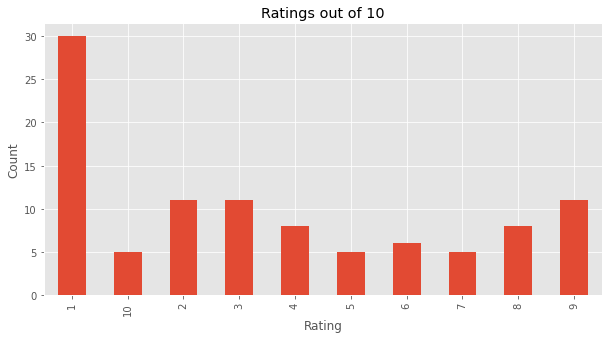

In [33]:
#Ploting the bar grap to see the frequency of various rating values
df1=df['Ratings'].value_counts().sort_index().plot(kind='bar', title='Ratings out of 10', 
figsize=(10,5))

#X and Y labels
df1.set_xlabel('Rating')
df1.set_ylabel('Count')
df1

# NLTK

In [34]:
#NLTK Stuff
Example =df['Review'][70]
print(Example)

|  I virtually gave up on British Airways about three years ago, writing off my Avios and opting for other airlines. But my return flights from Heathrow to Lisbon this week were very good. The aircraft were pretty much full, but the service was excellent and the food surprisingly good. A particular shout-out to a flight attendant called Jo, but all the teams there and back were enthusiastic and attentive. I'm going to have to start spending those Avios.


In [35]:
#Tokenizing the each word to get the overall sentence score
tokens = nltk.word_tokenize(Example)
print(tokens)

['|', 'I', 'virtually', 'gave', 'up', 'on', 'British', 'Airways', 'about', 'three', 'years', 'ago', ',', 'writing', 'off', 'my', 'Avios', 'and', 'opting', 'for', 'other', 'airlines', '.', 'But', 'my', 'return', 'flights', 'from', 'Heathrow', 'to', 'Lisbon', 'this', 'week', 'were', 'very', 'good', '.', 'The', 'aircraft', 'were', 'pretty', 'much', 'full', ',', 'but', 'the', 'service', 'was', 'excellent', 'and', 'the', 'food', 'surprisingly', 'good', '.', 'A', 'particular', 'shout-out', 'to', 'a', 'flight', 'attendant', 'called', 'Jo', ',', 'but', 'all', 'the', 'teams', 'there', 'and', 'back', 'were', 'enthusiastic', 'and', 'attentive', '.', 'I', "'m", 'going', 'to', 'have', 'to', 'start', 'spending', 'those', 'Avios', '.']


In [36]:
tokens = nltk.word_tokenize(Example)
tokens[:10]

['|',
 'I',
 'virtually',
 'gave',
 'up',
 'on',
 'British',
 'Airways',
 'about',
 'three']

In [37]:
tagged =nltk.pos_tag(tokens)
tagged[:5]

[('|', 'NN'), ('I', 'PRP'), ('virtually', 'RB'), ('gave', 'VBD'), ('up', 'RP')]

In [38]:
entities =nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  |/NN
  I/PRP
  virtually/RB
  gave/VBD
  up/RP
  on/IN
  (GPE British/NNP)
  Airways/NNP
  about/IN
  three/CD
  years/NNS
  ago/RB
  ,/,
  writing/VBG
  off/RP
  my/PRP$
  Avios/NNS
  and/CC
  opting/VBG
  for/IN
  other/JJ
  airlines/NNS
  ./.
  But/CC
  my/PRP$
  return/NN
  flights/NNS
  from/IN
  (GPE Heathrow/NNP)
  to/TO
  Lisbon/VB
  this/DT
  week/NN
  were/VBD
  very/RB
  good/JJ
  ./.
  The/DT
  aircraft/NN
  were/VBD
  pretty/RB
  much/JJ
  full/JJ
  ,/,
  but/CC
  the/DT
  service/NN
  was/VBD
  excellent/JJ
  and/CC
  the/DT
  food/NN
  surprisingly/RB
  good/JJ
  ./.
  A/DT
  particular/JJ
  shout-out/NN
  to/TO
  a/DT
  flight/NN
  attendant/NN
  called/VBN
  Jo/NNP
  ,/,
  but/CC
  all/PDT
  the/DT
  teams/NNS
  there/EX
  and/CC
  back/RB
  were/VBD
  enthusiastic/JJ
  and/CC
  attentive/JJ
  ./.
  I/PRP
  'm/VBP
  going/VBG
  to/TO
  have/VB
  to/TO
  start/VB
  spending/VBG
  those/DT
  Avios/NNP
  ./.)


# #Sentiment Scoring

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [40]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [41]:
sia.polarity_scores('You are so ugly')

{'neg': 0.586, 'neu': 0.414, 'pos': 0.0, 'compound': -0.6418}

In [42]:
sia.polarity_scores('Example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [43]:
id_values = list(range(0, 100))  # create a list of 100 values from 1 to 100
id_series = pd.Series(id_values)  # create a new Pandas Series with the values
df['id'] = id_series  # add the Series as a new column to the DataFrame

df.tail(5)

,Customer Name,Review Heading,Review,Seat Type,Ratings,id
ID,,,,,,
95,Adam Kirk,"""She was attentive, warm, friendly""","| This review is specifically about Maddie, c...",February 2023,1,95
96,S Keane,"""cramped single aisle aircraft""","| 5 hours in a cramped single aisle aircraft,...",no,10,96
97,L Pulliam,"""it was an OK experience""",DFW-LHR. Had an easy transfer at DFW from Amer...,A320,3,97
98,John Rolfe,"""wait for cases at Heathrow T5""",| Check in at Jersey straightforward. There i...,Couple Leisure,6,98
99,John Rolfe,"""cabin crew are usually exceptional""",| Check in at LHR T5 was very quick and queue...,Economy Class,7,99


In [44]:
#To find the polarity score of entire dataset on review column
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review = row['Review']
    myid = row['id']
    res[myid] = sia.polarity_scores(Review)
res

  0%|          | 0/100 [00:00<?, ?it/s]

{0: {'neg': 0.147, 'neu': 0.8, 'pos': 0.053, 'compound': -0.9253},
 1: {'neg': 0.107, 'neu': 0.839, 'pos': 0.054, 'compound': -0.987},
 2: {'neg': 0.02, 'neu': 0.973, 'pos': 0.007, 'compound': -0.4094},
 3: {'neg': 0.179, 'neu': 0.77, 'pos': 0.051, 'compound': -0.9241},
 4: {'neg': 0.055, 'neu': 0.912, 'pos': 0.034, 'compound': -0.7076},
 5: {'neg': 0.029, 'neu': 0.935, 'pos': 0.036, 'compound': 0.09},
 6: {'neg': 0.038, 'neu': 0.711, 'pos': 0.251, 'compound': 0.9624},
 7: {'neg': 0.034, 'neu': 0.942, 'pos': 0.024, 'compound': -0.4932},
 8: {'neg': 0.06, 'neu': 0.932, 'pos': 0.008, 'compound': -0.7579},
 9: {'neg': 0.146, 'neu': 0.754, 'pos': 0.1, 'compound': -0.771},
 10: {'neg': 0.051, 'neu': 0.686, 'pos': 0.263, 'compound': 0.9455},
 11: {'neg': 0.105, 'neu': 0.774, 'pos': 0.122, 'compound': 0.4985},
 12: {'neg': 0.092, 'neu': 0.874, 'pos': 0.034, 'compound': -0.796},
 13: {'neg': 0.067, 'neu': 0.751, 'pos': 0.181, 'compound': 0.6597},
 14: {'neg': 0.104, 'neu': 0.747, 'pos': 0.149,

In [45]:
#Saving Score in Dataframe and Transposing with t
vaders = pd.DataFrame(res).T
vaders.index.name = 'id'  # rename the index column to 'id'
vaders = vaders.reset_index()  # reset the index to create a new 'id' column
vaders = vaders.merge(df, how='left')  # merge with the original DataFrame
vaders = vaders[['id', 'Review', 'neg', 'neu', 'pos', 'compound']]  # reorder columns

vaders

,id,Review,neg,neu,pos,compound
0,0,This was literally one of the worst experience...,0.147,0.800,0.053,-0.9253
1,1,| The usual shambolic unfolding that BA has n...,0.107,0.839,0.054,-0.9870
2,2,Lost my case and took 6 weeks to locate it and...,0.020,0.973,0.007,-0.4094
3,3,| The incoming and outgoing flight was delaye...,0.179,0.770,0.051,-0.9241
4,4,| Back in December my family and I as we were...,0.055,0.912,0.034,-0.7076
...,...,...,...,...,...,...
95,95,"| This review is specifically about Maddie, c...",0.059,0.696,0.246,0.8225
96,96,"| 5 hours in a cramped single aisle aircraft,...",0.114,0.727,0.158,0.4019
97,97,DFW-LHR. Had an easy transfer at DFW from Amer...,0.027,0.777,0.196,0.9918
98,98,| Check in at Jersey straightforward. There i...,0.129,0.804,0.067,-0.7220


In [46]:
#Adding the vaders to original dataset with scores
df = pd.concat([df, vaders.drop('Review', axis=1)], axis=1)
df.head(2)

,Customer Name,Review Heading,Review,Seat Type,Ratings,id,id,neg,neu,pos,compound
0,Martin McCormack,"""one of the worst experiences""",This was literally one of the worst experience...,Solo Leisure,5,0,0,0.147,0.800,0.053,-0.9253
1,R Worton,"""a horror show of incompetence""",| The usual shambolic unfolding that BA has n...,Economy Class,1,1,1,0.107,0.839,0.054,-0.9870


In [47]:
#dropping the duplicate columns from Df
df = df.loc[:, ~df.columns.duplicated()]
df.head(2)

,Customer Name,Review Heading,Review,Seat Type,Ratings,id,neg,neu,pos,compound
0,Martin McCormack,"""one of the worst experiences""",This was literally one of the worst experience...,Solo Leisure,5,0,0.147,0.800,0.053,-0.9253
1,R Worton,"""a horror show of incompetence""",| The usual shambolic unfolding that BA has n...,Economy Class,1,1,0.107,0.839,0.054,-0.9870


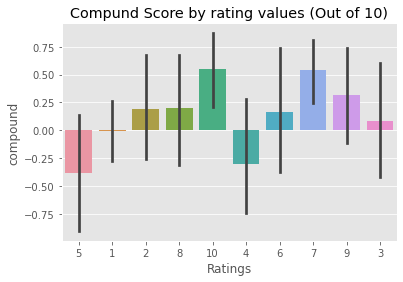

In [48]:
ax=sns.barplot(data=df, x='Ratings', y='compound')
ax.set_title('Compund Score by rating values (Out of 10)')
plt.show()

<AxesSubplot:xlabel='Ratings', ylabel='neg'>

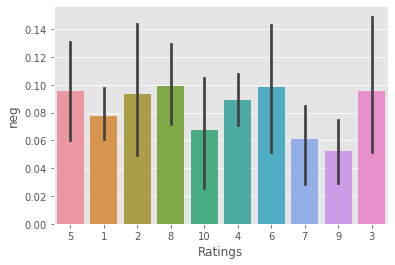

In [49]:
#Ploting the bars fro negativw score
sns.barplot(data=df, x='Ratings',y='neg')

<AxesSubplot:xlabel='Ratings', ylabel='pos'>

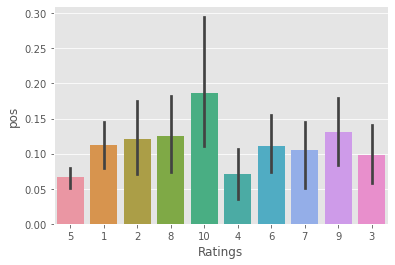

In [50]:
#Ploting the bars fro positive score
sns.barplot(data=df, x='Ratings',y='pos')

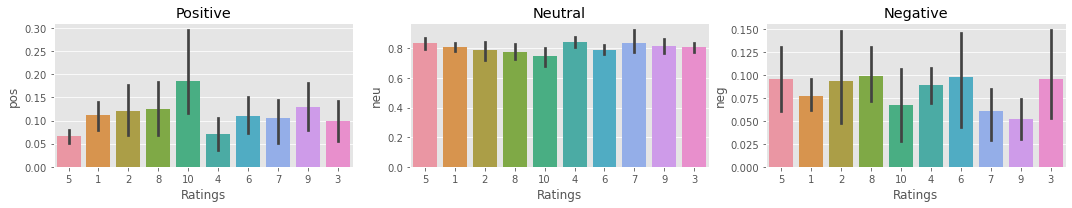

In [51]:
#Comparison
fig, axs = plt.subplots(1, 3, figsize=(15,3))
sns.barplot(data=df, x='Ratings', y='pos', ax=axs[0])
sns.barplot(data=df, x='Ratings', y='neu', ax=axs[1])
sns.barplot(data=df, x='Ratings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Machine Learning Modeling

In [52]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch as pt

In [53]:
#Pretrained Models
MODEL =f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
Model= AutoModelForSequenceClassification.from_pretrained(MODEL)

In [54]:
print(Example)
sia.polarity_scores(Example)

|  I virtually gave up on British Airways about three years ago, writing off my Avios and opting for other airlines. But my return flights from Heathrow to Lisbon this week were very good. The aircraft were pretty much full, but the service was excellent and the food surprisingly good. A particular shout-out to a flight attendant called Jo, but all the teams there and back were enthusiastic and attentive. I'm going to have to start spending those Avios.


{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.9799}

In [55]:
#Run for Roberta Model
encoded_text=tokenizer(Example, return_tensors='pt')
output =Model(**encoded_text)
scores = output[0][0].detach().numpy()
scores =softmax(scores)
scores

Scores_dict ={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(Scores_dict)

{'roberta_neg': 0.0037437251, 'roberta_neu': 0.024728116, 'roberta_pos': 0.971528}


In [56]:
# Now run Roberta on whole dataset:
def polarity_scores_roberta(Example):
    encoded_text = tokenizer(Example, return_tensors='pt')
    output = Model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    Scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    
    return Scores_dict

In [57]:

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        Review = row['Review']
        myid = row['id']
        vader_result = sia.polarity_scores(Review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(Review)
        both = {**vader_result_rename, **roberta_result}
        
        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")


  0%|          | 0/100 [00:00<?, ?it/s]

Broke for id 1
Broke for id 20
Broke for id 43
Broke for id 51
